In [3]:
# importer des librairies
import requests
from datetime import date, datetime
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as cx
import locale

In [4]:
# Pour mettre la date en français
locale.setlocale(locale.LC_ALL, 'fr_FR.UTF-8')

'fr_FR.UTF-8'

In [5]:
# Création d'une date au 1/1/2016
day = date(2016, 1, 1)
day

datetime.date(2016, 1, 1)

In [99]:
# Récupération des données sur l'opendata d'airpl
url_data = 'https://data.airpl.org/api/v1/inventaire/dataset/epci/2016/?&polluant=PM10'
url_data

# Création d'un dataframe avec les données
r = requests.get(url_data)
features = [f.get('properties') for f in r.json().get('features')]
data = pd.DataFrame(features).set_index('code_zone')
data.head(5)

,version,code_poll,nom_zone,valeur,nom_poll,annee,source
code_zone,,,,,,,
200067635,5ème version,24,CA Clisson Sèvre et Maine Agglo,245400.0,PM10,2016,BASEMIS® - Air Pays de la Loire
244400610,5ème version,24,CA de la Presqu'île de Guérande Atlantique (Ca...,282293.0,PM10,2016,BASEMIS® - Air Pays de la Loire
244400644,5ème version,24,CA de la Région Nazairienne et de l'Estuaire (...,518759.0,PM10,2016,BASEMIS® - Air Pays de la Loire
245300330,5ème version,24,CA de Laval,276817.0,PM10,2016,BASEMIS® - Air Pays de la Loire
200071678,5ème version,24,CA du Choletais,449744.0,PM10,2016,BASEMIS® - Air Pays de la Loire


In [100]:
# Récupération du découpage EPCI FRANCE openstreetmap sur data.gouv.fr
url_epci = 'https://www.data.gouv.fr/fr/datasets/r/64c8d128-5b51-46cb-bd7d-e83857548c79'
url_epci
epci = gpd.read_file(url_epci)
epci = epci.astype({"siren_epci": int}).rename(columns={"siren_epci": "code_zone"}).set_index('code_zone')
epci.head(5)

,nom_epci,ptot_epci,surf_km2,short_name,wikipedia,web,osm_id,nom_osm,type_epci,geometry
code_zone,,,,,,,,,,
200039519,CC du Quercy Blanc,8183.0,418.34,None,None,None,1647593.0,Communauté de communes du Quercy Blanc,CC,"POLYGON ((1.25537 44.28543, 1.24996 44.27418, ..."
243700929,CC de Sainte Maure de Touraine,13083.0,251.96,None,None,None,1663097.0,Communauté de Communes de Sainte-Maure-de-Tour...,CC,"POLYGON ((0.55436 46.95846, 0.53990 46.96033, ..."
200035327,CC Cazals-Salviac,5451.0,250.05,None,None,None,1647619.0,Communauté de communes Cazals-Salviac,CC,"POLYGON ((1.35876 44.58828, 1.33815 44.58802, ..."
247700339,SAN Val d'Europe,29852.0,31.98,None,fr:Syndicat d'agglomération nouvelle du Val-d'...,None,1984574.0,Syndicat d'agglomération nouvelle du Val d'Europe,SAN,"POLYGON ((2.80318 48.82924, 2.80249 48.82961, ..."
242200699,CC du Pays de Moncontour de Bretagne,11310.0,142.03,None,fr:Communauté de communes du Pays de Moncontour,http://www.pays-moncontour.com/,1996028.0,Communauté de communes du Pays de Moncontour d...,CC,"POLYGON ((-2.64770 48.31094, -2.64806 48.30940..."


In [101]:
print(data.shape)
print(epci.shape)
print(data.dtypes)
print(epci.dtypes)

(73, 7)
(2134, 10)
version       object
code_poll     object
nom_zone      object
valeur       float64
nom_poll      object
annee          int64
source        object
dtype: object
nom_epci        object
ptot_epci      float64
surf_km2       float64
short_name      object
wikipedia       object
web             object
osm_id         float64
nom_osm         object
type_epci       object
geometry      geometry
dtype: object


In [114]:
result = pd.merge(data, epci, left_index=True, right_index=True)
gdf = gpd.GeoDataFrame(
    result, geometry=result.geometry, crs=4326)
gdf

,version,code_poll,nom_zone,valeur,nom_poll,annee,source,nom_epci,ptot_epci,surf_km2,short_name,wikipedia,web,osm_id,nom_osm,type_epci,geometry
code_zone,,,,,,,,,,,,,,,,,
244400610,5ème version,24,CA de la Presqu'île de Guérande Atlantique (Ca...,282293.0,PM10,2016,BASEMIS® - Air Pays de la Loire,CA de la Presqu'île de Guérande Atlantique (Ca...,74683.0,396.61,None,None,None,420498.0,Communauté d'agglomération de la Presqu'île de...,CA,"MULTIPOLYGON (((-2.47871 47.27190, -2.47858 47..."
244400644,5ème version,24,CA de la Région Nazairienne et de l'Estuaire (...,518759.0,PM10,2016,BASEMIS® - Air Pays de la Loire,CA de la Région Nazairienne et de l'Estuaire (...,123334.0,324.44,CARENE,fr:Communauté d'agglomération de la région naz...,http://www.agglo-carene.fr/,420531.0,Communauté d'agglomération Région Nazairienne ...,CA,"MULTIPOLYGON (((-2.34399 47.22308, -2.34399 47..."
245300330,5ème version,24,CA de Laval,276817.0,PM10,2016,BASEMIS® - Air Pays de la Loire,CA de Laval,100352.0,439.23,None,None,None,1667013.0,Communauté d'agglomération Laval Agglomération,CA,"POLYGON ((-0.79588 47.95235, -0.79453 47.95891..."
248500589,5ème version,24,CA La Roche-sur-Yon Agglomération,289013.0,PM10,2016,BASEMIS® - Air Pays de la Loire,CA la Roche Sur Yon - Agglomération,97126.0,502.40,None,None,http://www.larochesuryonagglomeration.fr/,1364258.0,Communauté d'Agglomération La Roche-sur-Yon Ag...,CA,"POLYGON ((-1.30554 46.55653, -1.31074 46.54832..."
243500741,5ème version,24,CA Redon Agglomération,153904.0,PM10,2016,BASEMIS® - Air Pays de la Loire,CC du Pays de Redon,67204.0,976.72,None,fr:Communauté de communes du pays de Redon,None,1356053.0,Communauté de communes du Pays de Redon,CC,"POLYGON ((-2.19491 47.59052, -2.20112 47.59070..."
244900809,5ème version,24,CC Anjou Bleu Communauté,222041.0,PM10,2016,BASEMIS® - Air Pays de la Loire,CC du Canton de Candé,7961.0,226.31,None,None,None,1665812.0,Communauté de communes du Canton de Candé,CC,"POLYGON ((-1.04444 47.50554, -1.07262 47.50162..."
244900882,5ème version,24,CC Baugeois Vallée,163280.0,PM10,2016,BASEMIS® - Air Pays de la Loire,CC de Beaufort-En-Anjou,15394.0,144.39,None,None,None,1665804.0,Communauté de Communes de Beaufort-en-Anjou,CC,"POLYGON ((-0.12569 47.47243, -0.12136 47.47561..."
244400438,5ème version,24,CC de Grand Lieu,158511.0,PM10,2016,BASEMIS® - Air Pays de la Loire,CC de Grand Lieu,37402.0,301.18,None,None,None,421550.0,Communauté de Communes de Grand-Lieu,CC,"POLYGON ((-1.69072 46.96884, -1.68796 46.99250..."
244400453,5ème version,24,CC de la Région de Blain,67969.0,PM10,2016,BASEMIS® - Air Pays de la Loire,CC de la Région de Blain,15862.0,214.45,None,None,None,421578.0,Communauté de communes de la Région de Blain,CC,"POLYGON ((-1.90751 47.46323, -1.89542 47.46069..."


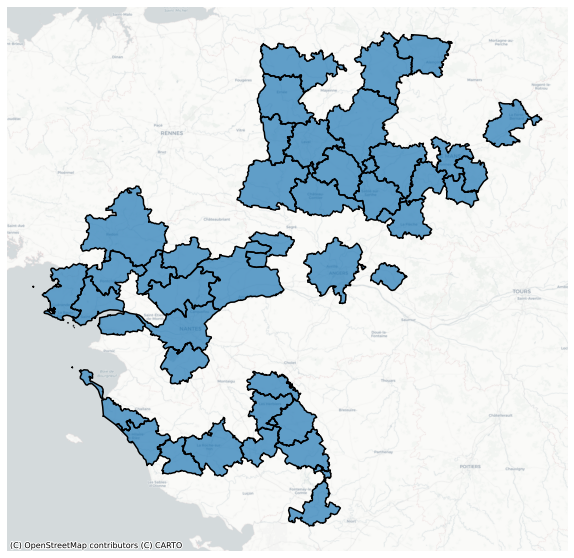

In [97]:
# Création de la carte
fig, ax = plt.subplots(figsize=(20,10))
gdf.to_crs('EPSG:3857').boundary.plot(ax=ax, color='black')
gdf.to_crs('EPSG:3857').plot(ax=ax, alpha=0.7, legend=True)
cx.add_basemap(ax=ax, crs='EPSG:3857', source=cx.providers.CartoDB.Positron)
ax.set_axis_off()
plt.show()

In [118]:
# C'est pas la bonne solution le découpage EPCI 2015 ne correspond pas aux données 2016

# On va utiliser le jeux de donnée geojson d'airpl
url = 'https://data.airpl.org/geoserver/emi_pays_de_la_loire_epci/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=emi_pays_de_la_loire_epci:emi_pays_de_la_loire_epci_2016&maxFeatures=10000&outputFormat=application%2Fjson'
data2 = gpd.read_file(url)
#epci = epci.astype({"siren_epci": int}).rename(columns={"siren_epci": "code_zone"}).set_index('code_zone')
data2.head(5)

,id,code_dept,code_epci,lib_epci,so2_kg,nox_kg,co_kg,pm10_kg,pm25_kg,covnm_kg,...,nh3_kg,pb_kg,cd_kg,as_kg,ni_kg,bap_kg,version,annee_inv,source,geometry
0,emi_pays_de_la_loire_epci_2016.fid-63549b96_17...,44,200000438,CC du Pays de Pontchâteau St Gildas des Bois,8435.0,400507,1067589,128668,79261,337987,...,588938,29.1,0.1407,1.610,1.316,2.808,5ème version,2016,BASEMIS® - Air Pays de la Loire,"MULTIPOLYGON (((325043.000 6719775.000, 325092..."
1,emi_pays_de_la_loire_epci_2016.fid-63549b96_17...,44,200067346,CA Pornic Agglo Pays de Retz,20522.0,527556,1849138,283450,136524,453437,...,981828,52.3,0.2753,2.481,13.029,4.695,5ème version,2016,BASEMIS® - Air Pays de la Loire,"MULTIPOLYGON (((322628.000 6670591.000, 322359..."
2,emi_pays_de_la_loire_epci_2016.fid-63549b96_17...,44,200067635,CA Clisson Sèvre et Maine Agglo,NaN,688243,1593274,245400,143601,478022,...,893489,50.9,0.3230,3.007,7.303,3.896,5ème version,2016,BASEMIS® - Air Pays de la Loire,"MULTIPOLYGON (((380591.000 6669557.000, 380591..."
3,emi_pays_de_la_loire_epci_2016.fid-63549b96_17...,44,200067866,CC Sèvre et Loire,15850.0,561121,1366918,158846,114110,417708,...,275095,33.7,NaN,2.080,1.864,3.486,5ème version,2016,BASEMIS® - Air Pays de la Loire,"MULTIPOLYGON (((378911.000 6679134.000, 378911..."
4,emi_pays_de_la_loire_epci_2016.fid-63549b96_17...,44,200071546,CC Sud Retz Atlantique,12570.0,336477,972817,179035,88154,204573,...,1240765,44.7,0.2695,2.165,2.240,2.458,5ème version,2016,BASEMIS® - Air Pays de la Loire,"MULTIPOLYGON (((349097.000 6651474.000, 349072..."


In [119]:
# modification de la projection
data2 = data2.to_crs(3857)
data2.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

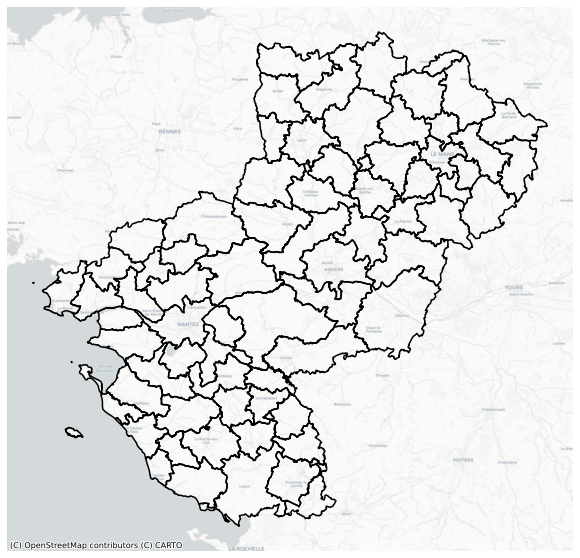

In [120]:
# Création de la carte
fig, ax = plt.subplots(figsize=(20,10))
data2.to_crs('EPSG:3857').boundary.plot(ax=ax, color='black')
cx.add_basemap(ax=ax, crs='EPSG:3857', source=cx.providers.CartoDB.Positron)
ax.set_axis_off()
plt.show()

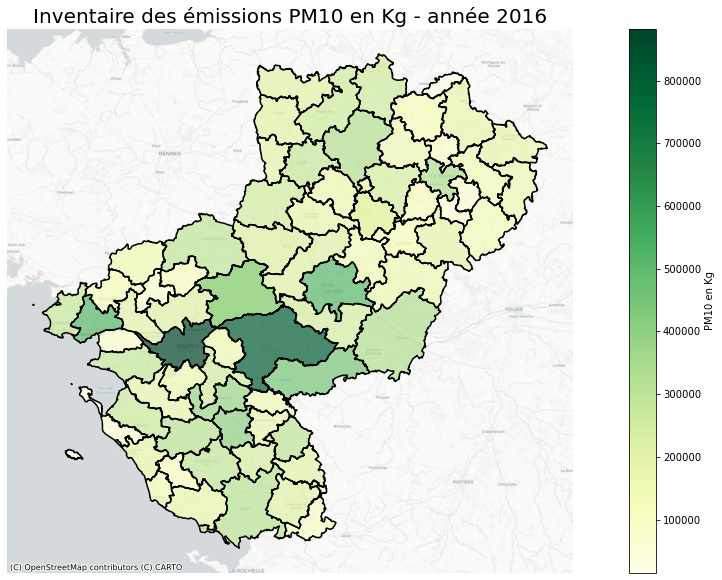

In [151]:
# Création de la carte
fig, ax = plt.subplots(figsize=(20,10))
data2.to_crs('EPSG:3857').boundary.plot(ax=ax, color='black')
data2.to_crs('EPSG:3857').plot(
    column='pm10_kg', ax=ax, cmap="YlGn" ,alpha=0.7, legend=True,
    legend_kwds={'label': "PM10 en Kg"})
cx.add_basemap(ax=ax, crs='EPSG:3857', source=cx.providers.CartoDB.Positron)
ax.set_title(f"Inventaire des émissions PM10 en Kg - année {datetime.strftime(day, '%Y')}", fontsize=20)
ax.set_axis_off()
plt.show()

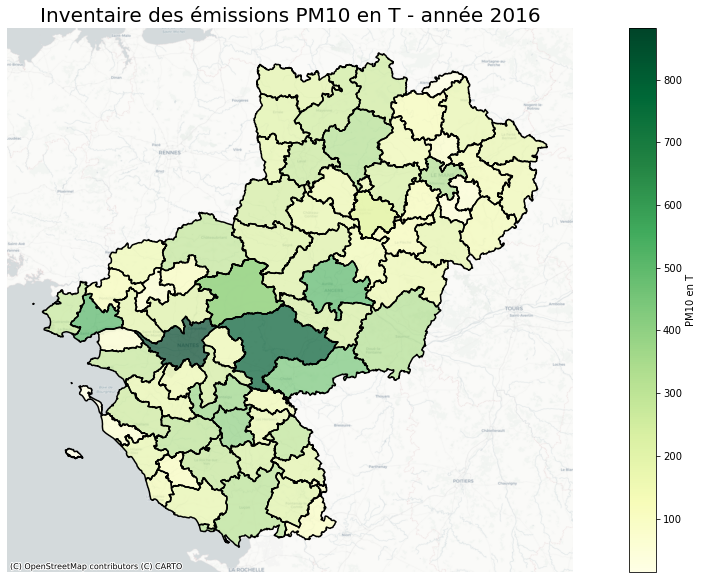

In [153]:
# Création de la carte
data2['pm10_t'] = data2['pm10_kg'] / 1000
fig, ax = plt.subplots(figsize=(20,10))
data2.to_crs('EPSG:3857').boundary.plot(ax=ax, color='black')
data2.to_crs('EPSG:3857').plot(
    column='pm10_t', ax=ax, cmap="YlGn" ,alpha=0.7, legend=True,
    legend_kwds={'label': "PM10 en T"})
cx.add_basemap(ax=ax, crs='EPSG:3857', source=cx.providers.CartoDB.Positron)
ax.set_title(f"Inventaire des émissions PM10 en T - année {datetime.strftime(day, '%Y')}", fontsize=20)
ax.set_axis_off()
plt.show()